In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression  # Correct import
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# Load Dataset
df = pd.read_csv("diabetes.csv")

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Get the shape of the DataFrame
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (768, 9)


In [9]:
# Get column data types
print("Data Types:\n", df.dtypes)

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [10]:
df.groupby('Outcome').describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  500.0  31.190000   
1        141.257463  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 64 columns]

In [11]:
# Get summary statistics
df.describe().T  # Transpose for better readability

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [12]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
# Visualizing missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

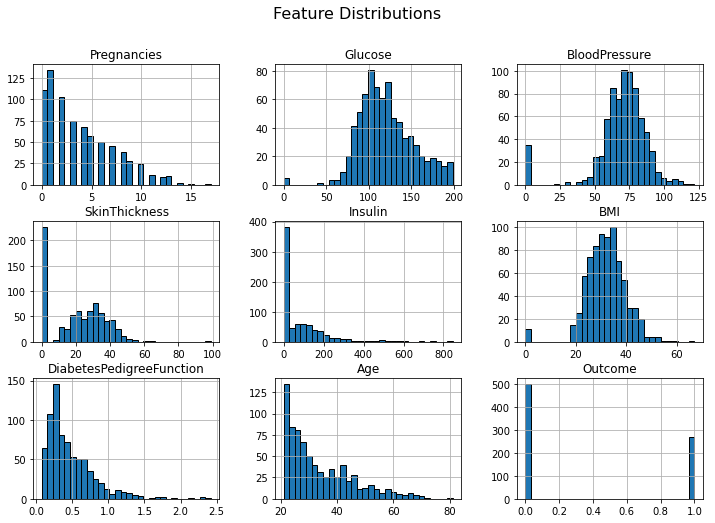

In [14]:
# Plot distributions of numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

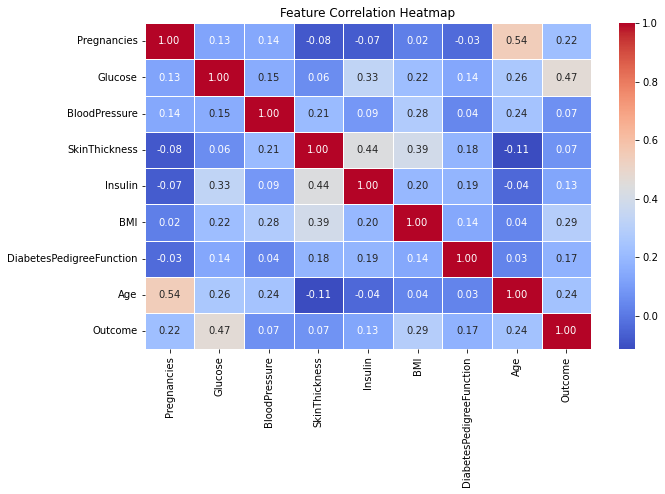

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.show()

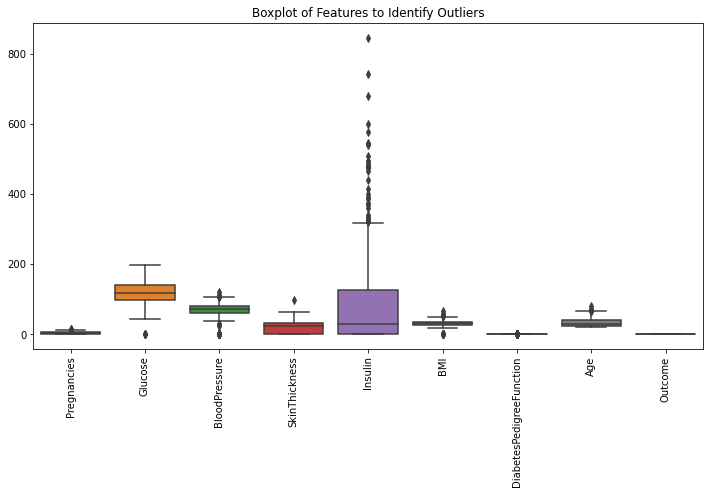

In [16]:
# Boxplot for all numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features to Identify Outliers")
plt.show()

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out data points that are outside the bounds
df_no_outliers = df[(df['Insulin'] >= lower_bound) & (df['Insulin'] <= upper_bound)]


# You can assign based on the method you prefer
df= df_no_outliers


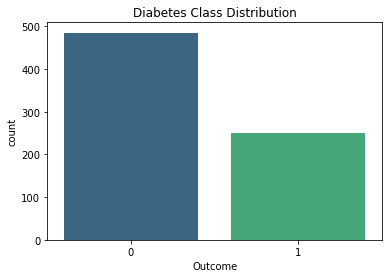

In [18]:
sns.countplot(x=df['Outcome'], palette='viridis')
plt.title("Diabetes Class Distribution")
plt.show()

In [19]:
# Splitting dataset
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [20]:
from sklearn.preprocessing import MinMaxScaler
# Scaling features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Naïve Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.26%


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy: 82.81%


In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy: 73.30%


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy: 81.00%


In [25]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Accuracy: 83.26%


In [26]:
correlation_matrix = df.corr()
correlation_matrix

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.145973       0.141183      -0.086904   
Glucose                      0.145973  1.000000       0.157764       0.012172   
BloodPressure                0.141183  0.157764       1.000000       0.204248   
SkinThickness               -0.086904  0.012172       0.204248       1.000000   
Insulin                     -0.097015  0.219678       0.104340       0.486500   
BMI                          0.022434  0.212414       0.281522       0.379985   
DiabetesPedigreeFunction    -0.036690  0.113037       0.039816       0.173589   
Age                          0.540206  0.277492       0.241986      -0.122144   
Outcome                      0.223300  0.464128       0.064360       0.054106   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.097015  0.022434                 -0.036690   
Glucose                   0.219678  0.212414                  0.113037   
BloodPressure             0.104340  0.281522                  0.039816   
SkinThickness             0.486500  0.379985                  0.173589   
Insulin                   1.000000  0.199290                  0.186657   
BMI                       0.199290  1.000000                  0.143219   
DiabetesPedigreeFunction  0.186657  0.143219                  1.000000   
Age                      -0.098004  0.047741                  0.042365   
Outcome                   0.088944  0.297225                  0.183005   

                               Age   Outcome  
Pregnancies               0.540206  0.223300  
Glucose                   0.277492  0.464128  
BloodPressure             0.241986  0.064360  
SkinThickness            -0.122144  0.054106  
Insulin                  -0.098004  0.088944  
BMI                       0.047741  0.297225  
DiabetesPedigreeFunction  0.042365  0.183005  
Age                       1.000000  0.231023  
Outcome                   0.231023  1.000000

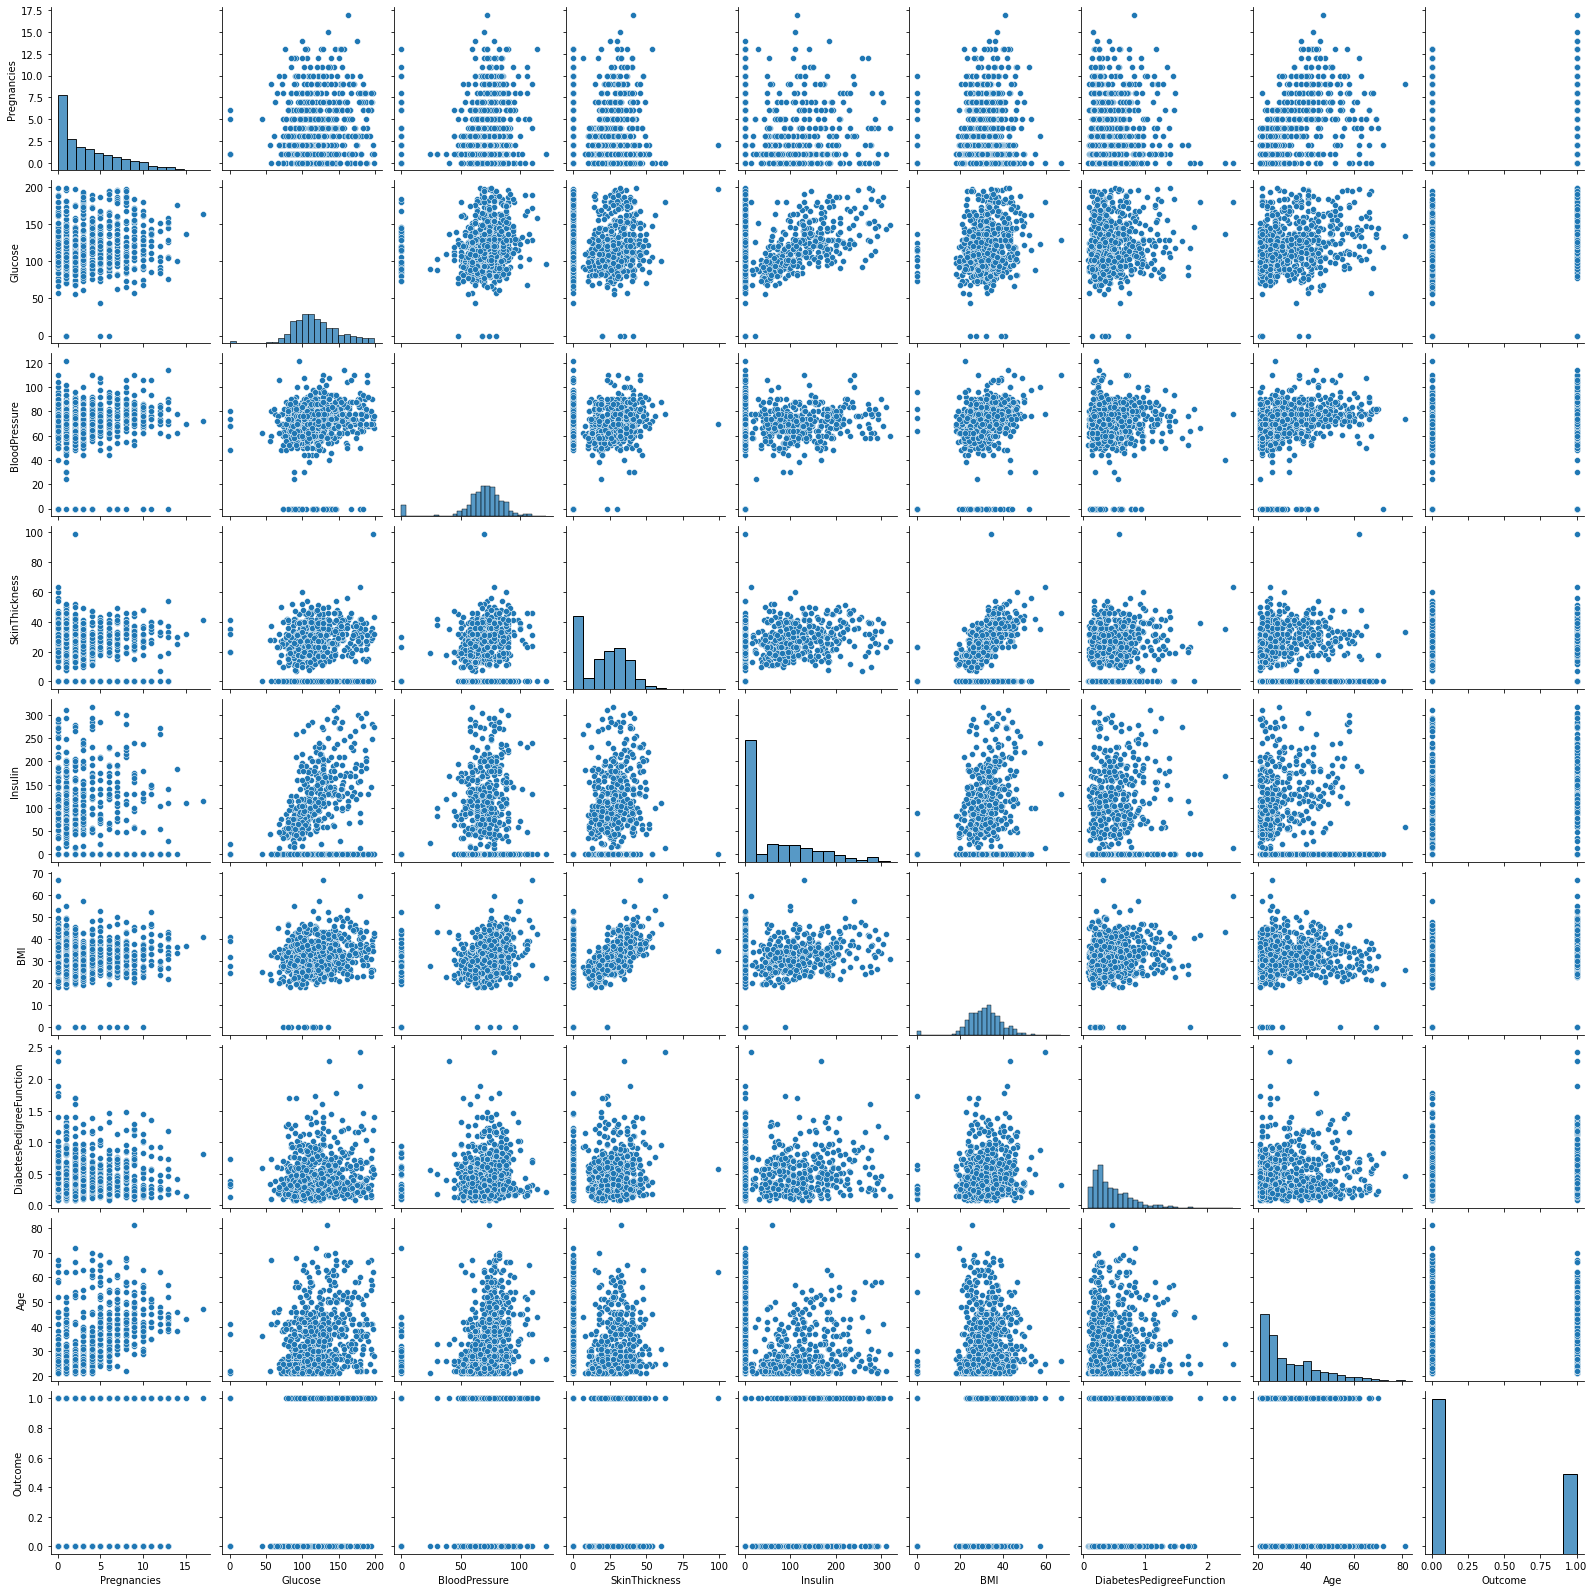

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.pairplot(df)
plt.show()


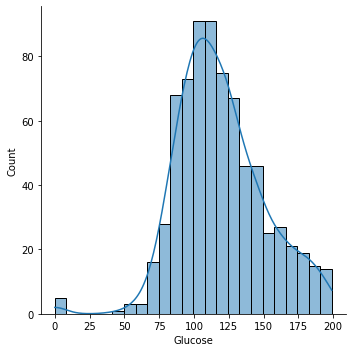

In [28]:
sns.displot(df['Glucose'], kde=True)  # Change 'Glucose' to any column for visualization
plt.show()


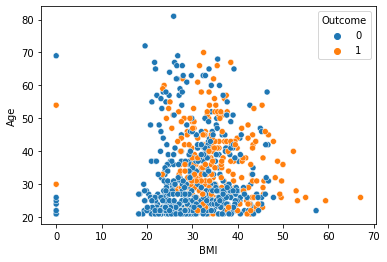

In [29]:
sns.scatterplot(x='BMI', y='Age', data=df, hue='Outcome')  # Example with 'BMI' vs 'Age'
plt.show()


In [30]:
import plotly.express as px

fig = px.histogram(df, x='Glucose', color='Outcome', nbins=20)
fig.show()


In [31]:
fig = px.scatter(df, x='BMI', y='Age', color='Outcome', title="BMI vs Age")
fig.show()


In [32]:
fig = px.histogram(df, x='Glucose', nbins=20, title="Histogram of Glucose")
fig.show()


In [33]:
fig = px.scatter(df, x='BMI', y='Age', size='Insulin', color='Glucose', 
                 title="Bubble Chart of BMI vs Age with Insulin Size")
fig.show()


In [34]:
fig = px.violin(df, y='Insulin', box=True, points="all", title="Violin Plot of Insulin")
fig.show()


In [35]:
fig = px.scatter_3d(df, x='BMI', y='Age', z='Glucose', title="3D Scatter Plot of BMI, Age, and Glucose")
fig.show()


In [36]:
fig = px.pie(df, names='Outcome', title="Pie Chart of Outcome Distribution")
fig.show()


In [37]:
fig = px.bar(df, x='Outcome', y='BMI', color='Outcome', title="Stacked Bar Chart of BMI by Outcome", text='BMI')
fig.show()


In [38]:
import plotly.express as px

# Scatter Plot for BMI vs Outcome
fig = px.scatter(df, x='BMI', y='Outcome', title="Scatter Plot of BMI vs Outcome")
fig.show()

# Scatter Plot for Glucose vs Outcome
fig = px.scatter(df, x='Glucose', y='Outcome', title="Scatter Plot of Glucose vs Outcome")
fig.show()

# Scatter Plot for Age vs Outcome
fig = px.scatter(df, x='Age', y='Outcome', title="Scatter Plot of Age vs Outcome")
fig.show()
